# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository - https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd
from IPython.display import display
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
pd.set_option('display.max_columns', None)
survey_data.head(5)

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
for col in survey_data.columns: 
    print(col) 

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [4]:
value_counts = survey_data['JobRoleInterest'].value_counts(normalize=True)
value_counts

Full-Stack Web Developer                                                                                                                                                                                               0.117706
  Front-End Web Developer                                                                                                                                                                                              0.064359
  Data Scientist                                                                                                                                                                                                       0.021739
Back-End Web Developer                                                                                                                                                                                                 0.020309
  Mobile Developer                                                                                      

Above we generated a relative frequency distiribution table for the JobRoleInterest column, which describes for every participant the role(s) they'd be interested in working. From the table we can see that:
- People interestedcan interested in more than one subject
- Since most people are interested in more than one subject, this sample is not representative?

In [5]:
contains_web_or_mobile = 0
does_not_contain_web_or_mobile = 0
for index,value in value_counts.items():
    if operator.contains(index.lower(), 'mobile') or operator.contains(index.lower(), 'web'):
        contains_web_or_mobile += value
    else:
        does_not_contain_web_or_mobile += value
        
print('contains_web_or_mobile: '+str(contains_web_or_mobile))
print('does_not_contain_web_or_mobile: '+ str(does_not_contain_web_or_mobile))


contains_web_or_mobile: 0.8631292906177321
does_not_contain_web_or_mobile: 0.13687070938215262


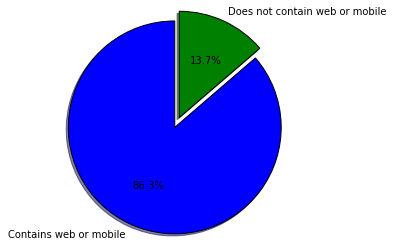

In [6]:

labels = 'Contains web or mobile', 'Does not contain web or mobile'
sizes = [contains_web_or_mobile*100, does_not_contain_web_or_mobile*100]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The focus of our courses is on web and mobile development. The above calculations and pie chart show that 86% of people are interested in at least one of these two subjects.

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [7]:
survey_data_with_interests_only = survey_data[survey_data['JobRoleInterest'].notnull()]
not_normalized = survey_data_with_interests_only['CountryLive'].value_counts()
normalized = survey_data_with_interests_only['CountryLive'].value_counts(normalize=True)*100

countries_with_interest_table = pd.DataFrame(data = {'Absolute frequencies': not_normalized, 'Percentage':normalized})
countries_with_interest_table


,Absolute frequencies,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Above we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [16]:
survey_data_with_interests_only_limit_countries = survey_data_with_interests_only[survey_data_with_interests_only['CountryLive'].str.contains('|'.join(['United States', 'India', 'United Kingdom', 'Canada']), na=True)]
survey_data_with_interests_only_limit_countries

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN,

In [31]:
#survey_data_with_interests_only_limit_countries['MonthsProgramming'] = survey_data_with_interests_only_limit_countries['MonthsProgramming'].replace(0, 1)
#display(survey_data_with_interests_only_limit_countries['MonthsProgramming'].value_counts())
survey_data_with_interests_only_limit_countries['SpentPerMonth'] = survey_data_with_interests_only_limit_countries['MoneyForLearning']/survey_data_with_interests_only_limit_countries['MonthsProgramming'].replace(0, 1)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



362

In [34]:
print(survey_data_with_interests_only_limit_countries['SpentPerMonth'].isna().sum())
print('There are 362 nulls in the data')

362
There are 362 nulls in the data


In [37]:
#remove nulls in spent per month and countrylive
no_nulls_spent_per_month = survey_data_with_interests_only_limit_countries[survey_data_with_interests_only_limit_countries['SpentPerMonth'].isna() == False]
no_nulls_country_live = no_nulls_spent_per_month[no_nulls_spent_per_month['CountryLive'].isna() == False]                                                                           
                                                                           

In [44]:
no_nulls_country_live[['CountryLive', 'SpentPerMonth']].groupby('CountryLive').mean().sort_index()

,SpentPerMonth
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,227.997996


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

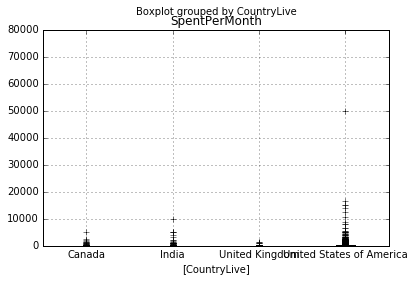

In [51]:
no_nulls_country_live[['CountryLive', 'SpentPerMonth']].boxplot(by='CountryLive')

As we can see above, all four countries have outliers, some more significant than others

In [59]:
#Let's eliminate extreme outliers
no_outliers = no_nulls_country_live[no_nulls_country_live['SpentPerMonth'] < 6000][['CountryLive', 'SpentPerMonth']]
no_outliers.groupby('CountryLive').mean()

,SpentPerMonth
CountryLive,
Canada,113.510961
India,113.748387
United Kingdom,45.534443
United States of America,142.654608


## Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$114 per month, compared to India (\$113) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$114 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [60]:
#Frequency table for the 'CountryLive' column
no_outliers['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.852602
India                       11.843117
United Kingdom               7.152012
Canada                       6.152269
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

- 60% for the US, 25% for India, 15% for Canada.
- 50% for the US, 30% for India, 20% for Canada; etc.
- Advertise only in the US and India, or the US and Canada. 

Again, it makes sense to split the advertisement budget unequally. For instance:

- 70% for the US, and 30% for India.
- 65% for the US, and 35% for Canada; etc.
- Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.



## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.